In [14]:
import pandas as pd

In [3]:
df = pd.read_csv('./data/churn_data.csv')

In [4]:
df

,number,system_id,grade_sect_cd,mbr_sex_cd,tmon_pchrg_lrn_dcnt,acmlt_pchrg_lrn_dcnt,acmlt_bilclct_amt,correct_rate_avg,learning_time_avg,media_action_cnt_sum,non_video_viewed_cnt_sum,get_mm_point_sum,label,re_purch
0,3,87ee0282-ece5-4491-bb07-be93854750ac,G011,M,31.0,247.0,952000.0,0.59,670.48,673.0,306.0,1377.0,0,False
1,7,8817ada1-b7ad-4713-b041-ee180540cb87,G011,M,31.0,238.0,1071000.0,0.00,0.00,0.0,0.0,0.0,0,False
2,8,884cddf4-bda5-4d81-960c-b9a4892645f0,G011,F,31.0,92.0,436000.0,0.70,400.44,1067.0,468.0,6289.0,0,False
3,21,8a58832b-592b-4b33-b05e-0e11422d73d5,G011,M,31.0,370.0,1417000.0,0.81,914.47,840.0,212.0,1714.0,0,False
4,25,8af8f516-a9f0-4b6a-a27f-fc77ba51f708,G011,M,1.0,1.0,109000.0,0.00,0.00,0.0,0.0,0.0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,66969,3d97d2c6-50dd-4c12-9fee-01578d691b0d,G016,F,31.0,613.0,1180000.0,0.69,262.33,41.0,26.0,590.0,0,True
59996,66986,41258431-f36d-46e7-a0d4-43f98edafd21,G016,M,31.0,62.0,178000.0,0.69,164.69,429.0,187.0,812.0,0,True
59997,66987,4157bf9d-92ea-4656-a2f6-9ac53ced8328,G016,F,31.0,217.0,872000.0,0.43,353.55,853.0,417.0,3064.0,0,False
59998,66988,416c8ba3-330b-45fc-aae8-91b548c28b3d,G016,M,31.0,312.0,869000.0,0.68,172.41,930.0,234.0,1092.0,0,True


In [5]:
df.columns

Index(['number', 'system_id', 'grade_sect_cd', 'mbr_sex_cd',
       'tmon_pchrg_lrn_dcnt', 'acmlt_pchrg_lrn_dcnt', 'acmlt_bilclct_amt',
       'correct_rate_avg', 'learning_time_avg', 'media_action_cnt_sum',
       'non_video_viewed_cnt_sum', 'get_mm_point_sum', 'label', 're_purch'],
      dtype='object')

In [6]:
df=df.drop(columns= ['number'])

In [7]:
df.head(3)

,system_id,grade_sect_cd,mbr_sex_cd,tmon_pchrg_lrn_dcnt,acmlt_pchrg_lrn_dcnt,acmlt_bilclct_amt,correct_rate_avg,learning_time_avg,media_action_cnt_sum,non_video_viewed_cnt_sum,get_mm_point_sum,label,re_purch
0,87ee0282-ece5-4491-bb07-be93854750ac,G011,M,31.0,247.0,952000.0,0.59,670.48,673.0,306.0,1377.0,0,False
1,8817ada1-b7ad-4713-b041-ee180540cb87,G011,M,31.0,238.0,1071000.0,0.00,0.00,0.0,0.0,0.0,0,False
2,884cddf4-bda5-4d81-960c-b9a4892645f0,G011,F,31.0,92.0,436000.0,0.70,400.44,1067.0,468.0,6289.0,0,False


In [16]:
df['mbr_sex_cd'].value_counts()

M    32843
F    25441
X     1716
Name: mbr_sex_cd, dtype: int64

In [18]:
# 데이터 전처리 성별에서 x 는 1716 명이여서 그냥 삭제
df = df.drop(df[df['mbr_sex_cd'] == 'X'].index)

In [20]:
df['mbr_sex_cd'].unique()

array(['M', 'F'], dtype=object)

In [24]:
# 성별 컬럼 추가
sex_dict = { 'M':0 , 'F' : 1}
df['sex'] = df['mbr_sex_cd'].apply(lambda x : sex_dict[x])
#학년 컬럼 추가
grade_dict = {'G011':1, 'G012':2, 'G013':3, 'G014':4, 'G015':5, 'G016':6}
df['grade'] = df['grade_sect_cd'].apply(lambda x: grade_dict[x])

In [29]:
df.head(3)

,system_id,grade_sect_cd,mbr_sex_cd,tmon_pchrg_lrn_dcnt,acmlt_pchrg_lrn_dcnt,acmlt_bilclct_amt,correct_rate_avg,learning_time_avg,media_action_cnt_sum,non_video_viewed_cnt_sum,get_mm_point_sum,label,re_purch,sex,grade
0,87ee0282-ece5-4491-bb07-be93854750ac,G011,M,31.0,247.0,952000.0,0.59,670.48,673.0,306.0,1377.0,0,False,0,1
1,8817ada1-b7ad-4713-b041-ee180540cb87,G011,M,31.0,238.0,1071000.0,0.00,0.00,0.0,0.0,0.0,0,False,0,1
2,884cddf4-bda5-4d81-960c-b9a4892645f0,G011,F,31.0,92.0,436000.0,0.70,400.44,1067.0,468.0,6289.0,0,False,1,1


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58284 entries, 0 to 59999
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   system_id                 58284 non-null  object 
 1   grade_sect_cd             58284 non-null  object 
 2   mbr_sex_cd                58284 non-null  object 
 3   tmon_pchrg_lrn_dcnt       58284 non-null  float64
 4   acmlt_pchrg_lrn_dcnt      58284 non-null  float64
 5   acmlt_bilclct_amt         58284 non-null  float64
 6   correct_rate_avg          58284 non-null  float64
 7   learning_time_avg         58284 non-null  float64
 8   media_action_cnt_sum      58284 non-null  float64
 9   non_video_viewed_cnt_sum  58284 non-null  float64
 10  get_mm_point_sum          58284 non-null  float64
 11  label                     58284 non-null  int64  
 12  re_purch                  58284 non-null  bool   
 13  sex                       58284 non-null  int64  
 14  grade 

In [57]:
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score
from lightgbm import plot_importance
import matplotlib.pyplot as plt
import koreanize_matplotlib
from sklearn.metrics import precision_recall_fscore_support

In [77]:
# 모델 구성
def churn_model(grade_df, grade_name):

    X = grade_df[[
        'tmon_pchrg_lrn_dcnt', 
        'acmlt_pchrg_lrn_dcnt', 
        'acmlt_bilclct_amt', 
        'correct_rate_avg',
        'learning_time_avg',
        'media_action_cnt_sum', 
        'non_video_viewed_cnt_sum',
        'get_mm_point_sum']]

    y = grade_df['label']

    # Train, Test 데이터 분리 (이탈 미이탈 값 확인)    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    print("[Train] {} 학년, {}, 이탈 : {}, 미이탈 : {}".format(grade_name, sex, y_train[y_train == 1].shape[0], y_train[y_train == 0].shape[0]))
    print("[Test] {}학년, {}, 이탈 : {}, 미이탈 : {}".format(grade_name, sex, y_test[y_test == 1].shape[0], y_test[y_test == 0].shape[0]))
    
    # LGBM 모델 학습
    lgbm_model = LGBMClassifier(random_state=0, verbose=-1)
    lgbm_model.fit(X_train, y_train)
    
    # 예측 결과
    y_pred = lgbm_model.predict(X_test)
    y_pred = list(y_pred)
    print("[Predict] {}, 학년, {}, 이탈: {}, 미이탈: {}".format(grade_name,sex, y_pred.count(1), y_pred.count(0)))
    
    # Accuracy
    acc = accuracy_score(y_test, y_pred)
    
    # Precision, recall, f1
    pre, re, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
    print("{} 학년, {}, acc: {}, precision: {}, recall: {}, f1: {}".format(grade_name,sex, acc, pre, re, f1))
    

    
    # 주요 변수 시각화
    fig, ax = plt.subplots(figsize=(5, 5))
    plot_importance(lgbm_model, ax=ax)
    plt.title("{}학년 {} Feature Importance".format(grade_name,sex))
    plt.show()
    return
    

[Train] 1 학년, 남, 이탈 : 90, 미이탈 : 4558
[Test] 1학년, 남, 이탈 : 16, 미이탈 : 1147
[Predict] 1, 학년, 남, 이탈: 17, 미이탈: 1146
1 학년, 남, acc: 0.9922613929492692, precision: 0.7058823529411765, recall: 0.75, f1: 0.7272727272727272


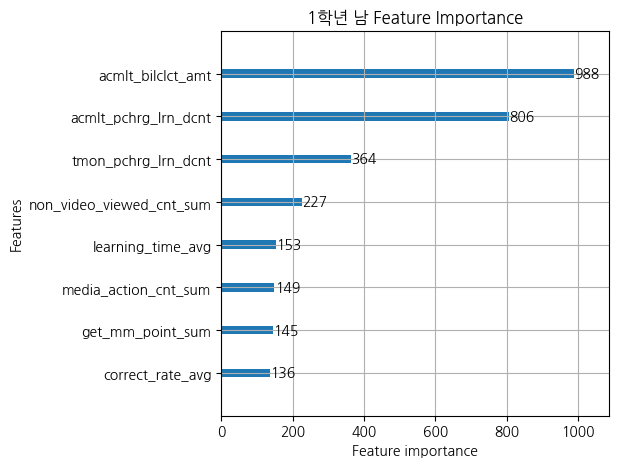

[Train] 1 학년, 여, 이탈 : 39, 미이탈 : 2937
[Test] 1학년, 여, 이탈 : 17, 미이탈 : 728
[Predict] 1, 학년, 여, 이탈: 7, 미이탈: 738
1 학년, 여, acc: 0.9812080536912752, precision: 0.7142857142857143, recall: 0.29411764705882354, f1: 0.4166666666666667


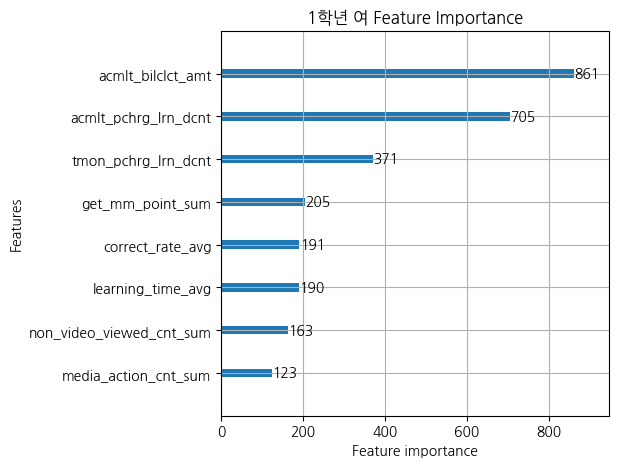

[Train] 2 학년, 남, 이탈 : 63, 미이탈 : 4509
[Test] 2학년, 남, 이탈 : 14, 미이탈 : 1129
[Predict] 2, 학년, 남, 이탈: 13, 미이탈: 1130
2 학년, 남, acc: 0.9886264216972879, precision: 0.5384615384615384, recall: 0.5, f1: 0.5185185185185186


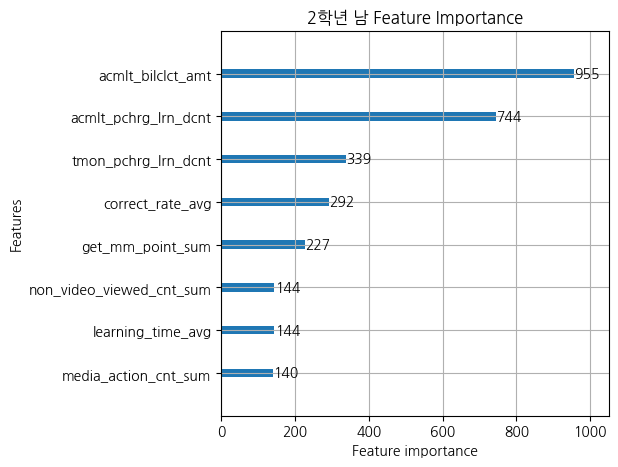

[Train] 2 학년, 여, 이탈 : 37, 미이탈 : 3185
[Test] 2학년, 여, 이탈 : 6, 미이탈 : 800
[Predict] 2, 학년, 여, 이탈: 1, 미이탈: 805
2 학년, 여, acc: 0.9937965260545906, precision: 1.0, recall: 0.16666666666666666, f1: 0.2857142857142857


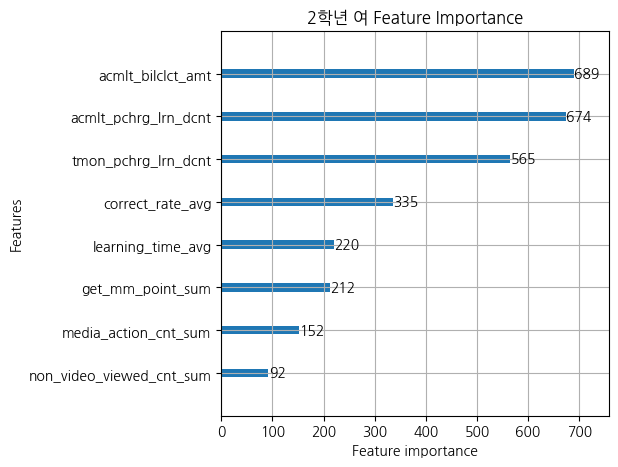

[Train] 3 학년, 남, 이탈 : 54, 미이탈 : 4325
[Test] 3학년, 남, 이탈 : 10, 미이탈 : 1085
[Predict] 3, 학년, 남, 이탈: 8, 미이탈: 1087
3 학년, 남, acc: 0.9926940639269406, precision: 0.625, recall: 0.5, f1: 0.5555555555555556


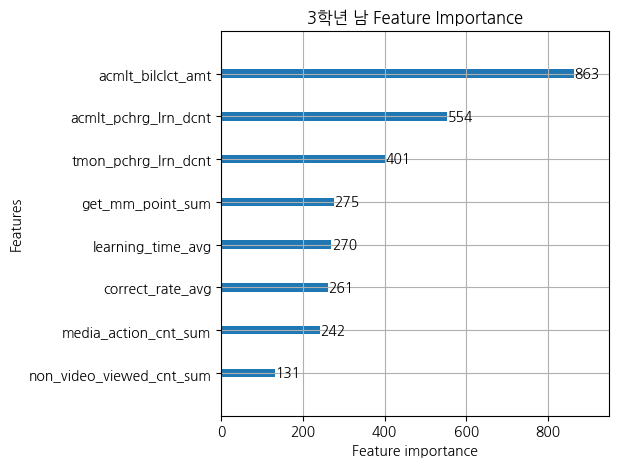

[Train] 3 학년, 여, 이탈 : 34, 미이탈 : 3399
[Test] 3학년, 여, 이탈 : 7, 미이탈 : 852
[Predict] 3, 학년, 여, 이탈: 6, 미이탈: 853
3 학년, 여, acc: 0.989522700814901, precision: 0.3333333333333333, recall: 0.2857142857142857, f1: 0.30769230769230765


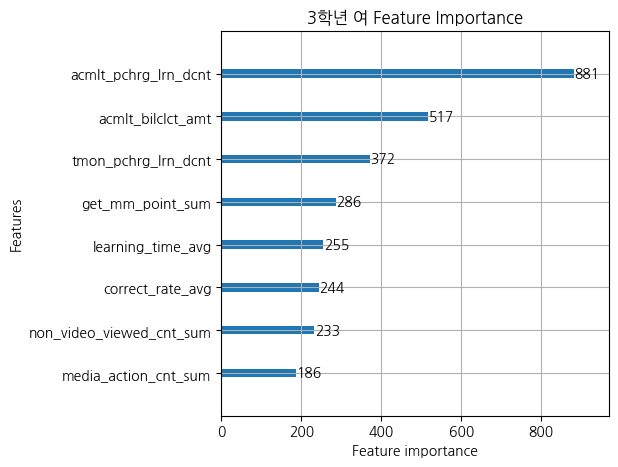

[Train] 4 학년, 남, 이탈 : 68, 미이탈 : 4256
[Test] 4학년, 남, 이탈 : 15, 미이탈 : 1067
[Predict] 4, 학년, 남, 이탈: 9, 미이탈: 1073
4 학년, 남, acc: 0.9907578558225508, precision: 0.7777777777777778, recall: 0.4666666666666667, f1: 0.5833333333333334


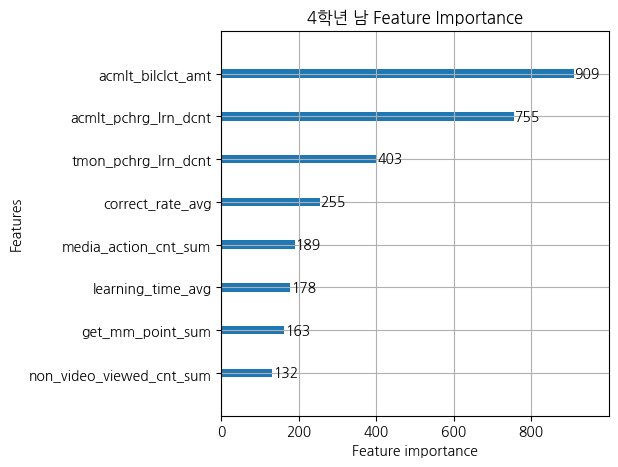

[Train] 4 학년, 여, 이탈 : 50, 미이탈 : 3427
[Test] 4학년, 여, 이탈 : 18, 미이탈 : 852
[Predict] 4, 학년, 여, 이탈: 10, 미이탈: 860
4 학년, 여, acc: 0.9885057471264368, precision: 0.9, recall: 0.5, f1: 0.6428571428571429


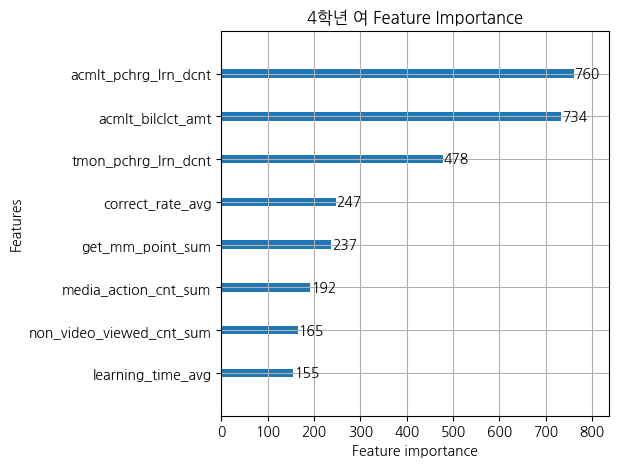

[Train] 5 학년, 남, 이탈 : 64, 미이탈 : 4161
[Test] 5학년, 남, 이탈 : 16, 미이탈 : 1041
[Predict] 5, 학년, 남, 이탈: 9, 미이탈: 1048
5 학년, 남, acc: 0.9858088930936613, precision: 0.5555555555555556, recall: 0.3125, f1: 0.39999999999999997


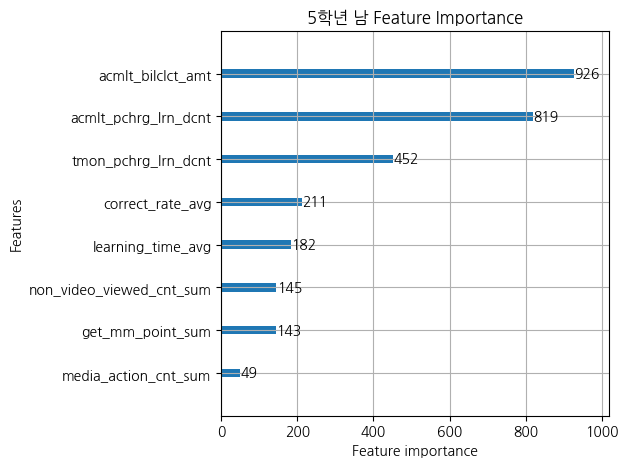

[Train] 5 학년, 여, 이탈 : 59, 미이탈 : 3497
[Test] 5학년, 여, 이탈 : 16, 미이탈 : 874
[Predict] 5, 학년, 여, 이탈: 7, 미이탈: 883
5 학년, 여, acc: 0.9831460674157303, precision: 0.5714285714285714, recall: 0.25, f1: 0.34782608695652173


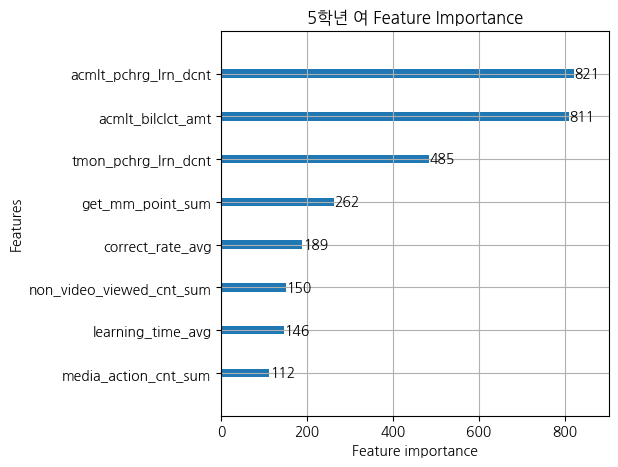

[Train] 6 학년, 남, 이탈 : 101, 미이탈 : 4023
[Test] 6학년, 남, 이탈 : 22, 미이탈 : 1009
[Predict] 6, 학년, 남, 이탈: 22, 미이탈: 1009
6 학년, 남, acc: 0.9864209505334627, precision: 0.6818181818181818, recall: 0.6818181818181818, f1: 0.6818181818181818


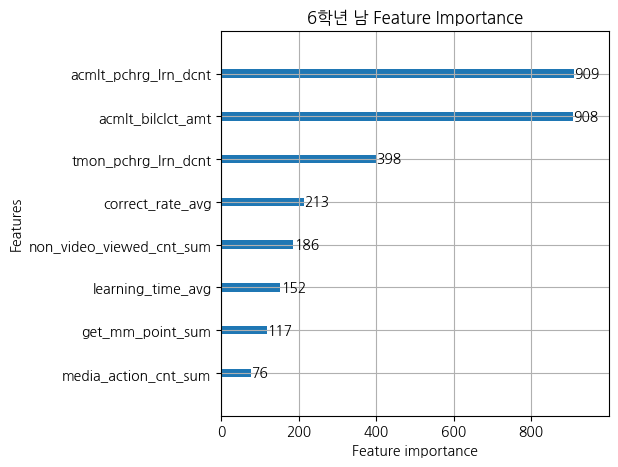

[Train] 6 학년, 여, 이탈 : 69, 미이탈 : 3616
[Test] 6학년, 여, 이탈 : 25, 미이탈 : 897
[Predict] 6, 학년, 여, 이탈: 11, 미이탈: 911
6 학년, 여, acc: 0.9739696312364425, precision: 0.5454545454545454, recall: 0.24, f1: 0.3333333333333333


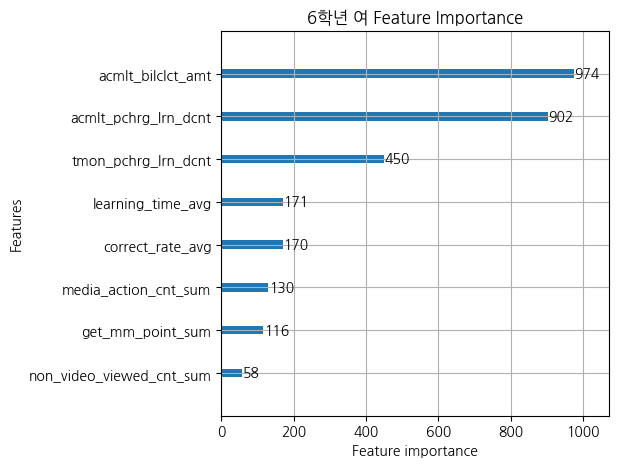

In [79]:
## 실행부 구성
for grade in range(1, 7):
    grade_df = df[df['grade'] == grade]
    for sex in range(0,2):
        grade_df_1 = grade_df[grade_df['sex']==sex]
        if sex == 0:
            sex = '남'
        else:
            sex = '여'
        churn_model(grade_df_1, grade_name = str(grade))  